# Relax Challenge

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
from datetime import datetime
from tqdm import tqdm 

## Importing Data

In [2]:
take_home_df = pd.read_csv('takehome_users.csv',encoding = 'ISO-8859-1')

In [3]:
take_home_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
engagement_df = pd.read_csv('takehome_user_engagement.csv')

In [5]:
engagement_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


## Cleaning and Structuring Data

In [6]:
# I want to figure out visit count by user_id
number_of_visits = pd.Series.to_frame(engagement_df['user_id'].value_counts())
number_of_visits.reset_index(inplace=True)
number_of_visits.rename(columns={'index':'user_id','user_id':'visits'},inplace=True)
number_of_visits.set_index('user_id',inplace=True)

number_of_visits

,visits
user_id,
3623,606
906,600
1811,593
7590,590
8068,585
...,...
4699,1
4698,1
4697,1


In [7]:
# Let's find the user_id's that have 3 or more visits to the site and start building out a dataframe with only these users 

adopted = pd.DataFrame(number_of_visits.loc[number_of_visits['visits']>=3])
adopted

,visits
user_id,
3623,606
906,600
1811,593
7590,590
8068,585
...,...
11778,3
241,3
4187,3


In [8]:
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

In [9]:
engagement_df.dtypes

time_stamp    datetime64[ns]
user_id                int64
visited                int64
dtype: object

In [10]:
engagement_df.set_index('user_id',inplace=True)

In [11]:
engagement_df

,time_stamp,visited
user_id,,
1,2014-04-22 03:53:30,1
2,2013-11-15 03:45:04,1
2,2013-11-29 03:45:04,1
2,2013-12-09 03:45:04,1
2,2013-12-25 03:45:04,1
...,...,...
11996,2013-09-06 06:14:15,1
11997,2013-01-15 18:28:37,1
11998,2014-04-27 12:45:16,1


In [12]:
clean_df = adopted.join(engagement_df,on='user_id',how='inner')

In [13]:
clean_df.drop(columns='visits')

,time_stamp,visited
user_id,,
3623,2012-06-27 14:34:33,1
3623,2012-07-01 14:34:33,1
3623,2012-07-02 14:34:33,1
3623,2012-07-04 14:34:33,1
3623,2012-07-08 14:34:33,1
...,...,...
8109,2014-04-10 10:05:29,1
8109,2014-04-28 10:05:29,1
8564,2013-12-17 14:17:38,1


In [14]:
clean_df.reset_index(inplace=True)

In [15]:
clean_df

,user_id,visits,time_stamp,visited
0,3623,606,2012-06-27 14:34:33,1
1,3623,606,2012-07-01 14:34:33,1
2,3623,606,2012-07-02 14:34:33,1
3,3623,606,2012-07-04 14:34:33,1
4,3623,606,2012-07-08 14:34:33,1
...,...,...,...,...
200997,8109,3,2014-04-10 10:05:29,1
200998,8109,3,2014-04-28 10:05:29,1
200999,8564,3,2013-12-17 14:17:38,1
201000,8564,3,2014-01-06 14:17:38,1


In [16]:
#basically want to build a for loop that goes through my dataframe (maybe i can group this by user_id?) and then it needs to check 
# the time_stamp of when they visited and if the range is greater than 7 days to it needs to move on to the next user_id but if the user did log in 3 or more times in 7 days it will have another column called 'adopted' signaling whether that user is
# an adopted user(value =1) or not(value=0)


#let's try grouping by user_id first 

grouped_user = pd.DataFrame(clean_df.groupby([pd.Grouper(key='user_id'),'time_stamp']).visited.sum())
grouped_user 

visited
user_id time_stamp                  
2       2013-11-15 03:45:04        1
        2013-11-29 03:45:04        1
        2013-12-09 03:45:04        1
        2013-12-25 03:45:04        1
        2013-12-31 03:45:04        1
...                              ...
11991   2014-04-20 14:22:45        1
        2014-04-25 14:22:45        1
        2014-04-28 14:22:45        1
        2014-05-17 14:22:45        1
        2014-05-30 14:22:45        1

[201002 rows x 1 columns]

I originally thought I would need to group the dataframe this way but eventually realized it was unnecessary. 

In [17]:
#creating a copy of the time stamp column so I can utilize it and create a column of its differences
time = grouped_user.index.get_level_values('time_stamp')
time

DatetimeIndex(['2013-11-15 03:45:04', '2013-11-29 03:45:04',
               '2013-12-09 03:45:04', '2013-12-25 03:45:04',
               '2013-12-31 03:45:04', '2014-01-08 03:45:04',
               '2014-02-03 03:45:04', '2014-02-08 03:45:04',
               '2014-02-09 03:45:04', '2014-02-13 03:45:04',
               ...
               '2014-05-23 11:04:47', '2014-05-24 11:04:47',
               '2014-05-26 11:04:47', '2014-05-27 11:04:47',
               '2014-06-01 11:04:47', '2014-04-20 14:22:45',
               '2014-04-25 14:22:45', '2014-04-28 14:22:45',
               '2014-05-17 14:22:45', '2014-05-30 14:22:45'],
              dtype='datetime64[ns]', name='time_stamp', length=201002, freq=None)

In [18]:
grouped_user['time'] = time

In [19]:
grouped_user.dtypes

visited             int64
time       datetime64[ns]
dtype: object

In [20]:
#creating column of time differences between each row and the next, want this to be in days
grouped_user['time_difference'] = grouped_user['time'].diff().apply(lambda x: x/np.timedelta64(1,'D')).fillna(0).astype('int64')

grouped_user

visited                time  time_difference
user_id time_stamp                                                       
2       2013-11-15 03:45:04        1 2013-11-15 03:45:04                0
        2013-11-29 03:45:04        1 2013-11-29 03:45:04               14
        2013-12-09 03:45:04        1 2013-12-09 03:45:04               10
        2013-12-25 03:45:04        1 2013-12-25 03:45:04               16
        2013-12-31 03:45:04        1 2013-12-31 03:45:04                6
...                              ...                 ...              ...
11991   2014-04-20 14:22:45        1 2014-04-20 14:22:45              -41
        2014-04-25 14:22:45        1 2014-04-25 14:22:45                5
        2014-04-28 14:22:45        1 2014-04-28 14:22:45                3
        2014-05-17 14:22:45        1 2014-05-17 14:22:45               19
        2014-05-30 14:22:45        1 2014-05-30 14:22:45               13

[201002 rows x 3 columns]

In [21]:
#Need to drop any negative time differences, these represent a shift into a new user_id
grouped_user.drop(grouped_user[grouped_user['time_difference']<0].index,inplace=True)
grouped_user

visited                time  time_difference
user_id time_stamp                                                       
2       2013-11-15 03:45:04        1 2013-11-15 03:45:04                0
        2013-11-29 03:45:04        1 2013-11-29 03:45:04               14
        2013-12-09 03:45:04        1 2013-12-09 03:45:04               10
        2013-12-25 03:45:04        1 2013-12-25 03:45:04               16
        2013-12-31 03:45:04        1 2013-12-31 03:45:04                6
...                              ...                 ...              ...
11988   2014-06-01 11:04:47        1 2014-06-01 11:04:47                5
11991   2014-04-25 14:22:45        1 2014-04-25 14:22:45                5
        2014-04-28 14:22:45        1 2014-04-28 14:22:45                3
        2014-05-17 14:22:45        1 2014-05-17 14:22:45               19
        2014-05-30 14:22:45        1 2014-05-30 14:22:45               13

[199157 rows x 3 columns]

In [22]:
grouped_user.reset_index()
grouped_user.drop(columns=['visited','time'],inplace=True)

In [23]:
grouped_user.reset_index(inplace=True)
grouped_user

,user_id,time_stamp,time_difference
0,2,2013-11-15 03:45:04,0
1,2,2013-11-29 03:45:04,14
2,2,2013-12-09 03:45:04,10
3,2,2013-12-25 03:45:04,16
4,2,2013-12-31 03:45:04,6
...,...,...,...
199152,11988,2014-06-01 11:04:47,5
199153,11991,2014-04-25 14:22:45,5
199154,11991,2014-04-28 14:22:45,3
199155,11991,2014-05-17 14:22:45,19


In [24]:
grouped_user['adopted'] = 0

for i in tqdm(grouped_user.index[1:199156]):
    if (grouped_user['user_id'].iloc[i]==grouped_user['user_id'].iloc[i-1] == grouped_user['user_id'].iloc[i+1]) and (grouped_user['time_difference'].iloc[i-1] + grouped_user['time_difference'].iloc[i] + grouped_user['time_difference'].iloc[i+1] <= 7):
        grouped_user.at[i,'adopted'] = 1
    else:
        grouped_user.at[i,'adopted'] = 0 
      
    

100%|██████████| 199155/199155 [00:19<00:00, 10333.03it/s]


In [25]:
grouped_user.head(30)

,user_id,time_stamp,time_difference,adopted
0,2,2013-11-15 03:45:04,0,0
1,2,2013-11-29 03:45:04,14,0
2,2,2013-12-09 03:45:04,10,0
3,2,2013-12-25 03:45:04,16,0
4,2,2013-12-31 03:45:04,6,0
5,2,2014-01-08 03:45:04,8,0
6,2,2014-02-03 03:45:04,26,0
7,2,2014-02-08 03:45:04,5,0
8,2,2014-02-09 03:45:04,1,0
9,2,2014-02-13 03:45:04,4,0


In [26]:
grouped_user['adopted'].value_counts()

1    143426
0     55731
Name: adopted, dtype: int64

In [27]:
#Only want the user_id that are adopted users 
adopted_users = grouped_user.loc[grouped_user['adopted']==1]

In [28]:
adopted_users

,user_id,time_stamp,time_difference,adopted
23,10,2013-03-02 22:08:03,1,1
28,10,2013-03-20 22:08:03,3,1
33,10,2013-04-13 22:08:03,2,1
34,10,2013-04-14 22:08:03,1,1
35,10,2013-04-17 22:08:03,3,1
...,...,...,...,...
199146,11988,2014-05-20 11:04:47,1,1
199147,11988,2014-05-21 11:04:47,1,1
199148,11988,2014-05-23 11:04:47,2,1
199149,11988,2014-05-24 11:04:47,1,1


In [29]:
adopted_users.drop(columns=['time_stamp','time_difference','adopted'],inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
adopted_users

,user_id
23,10
28,10
33,10
34,10
35,10
...,...
199146,11988
199147,11988
199148,11988
199149,11988


In [31]:
adopted = pd.DataFrame({'user_id':adopted_users.user_id.unique()})

In [32]:
adopted

,user_id
0,10
1,42
2,43
3,53
4,63
...,...
1335,11965
1336,11967
1337,11969
1338,11975


In [33]:
take_home_df.rename(columns={'object_id':'user_id'},inplace=True)

In [34]:
take_home_df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [35]:
#Merge two dataframes on each other to get table of only adopted users and their info 
df = pd.merge(take_home_df,adopted,on='user_id')

In [36]:
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
1,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
2,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0
3,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0
4,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN
...,...,...,...,...,...,...,...,...,...,...
1335,11965,2014-04-25 07:17:35,Storey Lewis,LewisStorey@cuvox.de,GUEST_INVITE,1.400657e+09,0,0,65,11251.0
1336,11967,2014-01-12 08:12:37,Barbosa Pedro,PedroFernandesBarbosa@gmail.com,GUEST_INVITE,1.401524e+09,0,0,15,5688.0
1337,11969,2013-06-01 00:48:14,Dickinson Aidan,AidanDickinson@hotmail.com,GUEST_INVITE,1.401411e+09,1,1,52,6647.0
1338,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0


## Exploring the data to find similarities between adopted users 

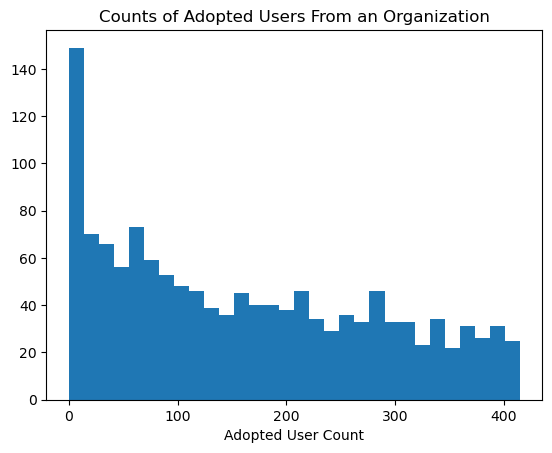

In [58]:
# let's check if most adopted users belong to a specific organization 


plt.hist(df.org_id,bins=30)
plt.title('Counts of Adopted Users From an Organization')
plt.xlabel('Adopted User Count')
plt.show()

Looks like most users do not belong to a reocurring organization number. There are also only 394 total users that have a value recorded for their organization ID -- not very many people when there are over 1300 people to account for.

In [51]:
df.org_id.value_counts(normalize=True)

7      0.011940
3      0.010448
2      0.009701
1      0.009701
13     0.008955
         ...   
323    0.000746
123    0.000746
227    0.000746
229    0.000746
176    0.000746
Name: org_id, Length: 394, dtype: float64

In [39]:
df.creation_source.value_counts(normalize=True) 

ORG_INVITE            0.344776
GUEST_INVITE          0.226119
SIGNUP                0.189552
SIGNUP_GOOGLE_AUTH    0.139552
PERSONAL_PROJECTS     0.100000
Name: creation_source, dtype: float64

It does look like most users were either invited via an organization or via a guest invite 

In [59]:
df.opted_in_to_mailing_list.value_counts(normalize=True)

0    0.741791
1    0.258209
Name: opted_in_to_mailing_list, dtype: float64

Majority were not opted into the mailing list 

In [60]:
df.enabled_for_marketing_drip.value_counts(normalize=True)

0    0.85
1    0.15
Name: enabled_for_marketing_drip, dtype: float64

Even fewer people were enabled for the marketing drip 

In [42]:
df.invited_by_user_id.value_counts()

2354.0    4
7358.0    3
2017.0    3
2771.0    3
7882.0    3
         ..
9691.0    1
3876.0    1
3565.0    1
3583.0    1
6647.0    1
Name: invited_by_user_id, Length: 648, dtype: int64

In [61]:
df.invited_by_user_id.isnull().sum()

575

In [62]:
(575/1340) * 100 

42.91044776119403

In [63]:
100 - 42.91

57.09